### Trabajo Final de Master
# Predicción de Ventas de Comestibles Corporación Favorita
# Análisis Exploratorio de Datos
### Autor Gabriel Kreplak
### Diciembre 2017
### PEC 2


Como actividad prevista en la planificación del TFM, este análisis exploratorio de datos, en adelante EDA, se centrará en la carga e inspección de los distintos ficheros incluídos en la competición.  
Este notebook se convertirá en un capítulo del trabajo final.  
La estructura de este análisis será la siguiente:  
**1. Carga de datos e Inspección** - Conversión de datos en formato csv a dataframes python y chequeo preliminar de integridad.  
**2. Exploración de datos auxiliares** - Exploración de todos los archivos excepto finchero train.csv  
**3. Exploración de datos de entreno de la predicción** 


In [1]:
# Importing the relevant libraries
import IPython.display
import json
import pandas as pd
import sys
sys.path.append('/Users/gabrielkreplak/anaconda3/lib/python3.6/site-packages')
import seaborn as sns
import squarify
%matplotlib inline
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import numpy as np
from scipy.fftpack import fft
from matplotlib import pyplot as plt
# D3 modules
from IPython.core.display import display, HTML, Javascript
from string import Template


# 1. Carga de Datos e Inspección

En este apartado se cargará todos los ficheros de datos excepto train.csv, que tendrá su tratamiento personalizado.  
Esto se debe a que el fichero consta de 125,5 millones de líneas con transacciones de las tiendas, lo que requeriría una capacidad de proceso muy excepcional. Popr ese motivo trabajaremos incialmente con un 5% (6 millones de líneas). 

In [4]:
items = pd.read_csv("../Favorita/input/items.csv")
holiday_events = pd.read_csv("../Favorita/input/holidays_events.csv")
stores = pd.read_csv("../Favorita/input/stores.csv")
oil = pd.read_csv("../Favorita/input/oil.csv")
transactions = pd.read_csv("../Favorita/input/transactions.csv",parse_dates=['date'])
# I read in the full training data just to get prior information and here is the output:
# Output: "125,497,040 rows | 6 columns"
train = pd.read_csv("../Favorita/input/train.csv", nrows=6000000, parse_dates=['date'])

In [26]:
print("There are {0} rows and {1} columns in the items data".
      format(items.shape[0], items.shape[1]))

print("There are {0} rows and {1} columns in the holiday_events data".
      format(holiday_events.shape[0], holiday_events.shape[1]))

print("There are {0} rows and {1} columns in the stores data".
      format(stores.shape[0], stores.shape[1]))

print("There are {0} rows and {1} columns in the oil data".
      format(oil.shape[0], oil.shape[1]))

print("There are {0} rows and {1} columns in the transactions data".
      format(transactions.shape[0], transactions.shape[1]))

print("There are {0} rows and {1} columns in the train data".
      format(train.shape[0], train.shape[1]))

There are 4100 rows and 4 columns in the items data
There are 350 rows and 6 columns in the holiday_events data
There are 54 rows and 5 columns in the stores data
There are 1218 rows and 2 columns in the oil data
There are 83488 rows and 3 columns in the transactions data
There are 6000000 rows and 6 columns in the train data


In [6]:
## Archivo train
## Cada línea = 1 transacción. 6 columnas: Fecha, Item, numero, y tienda
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [7]:
## Archivo Transaccions
## Numero de transacciones por día y tienda desde 2013
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [8]:
# Días de fiesta locales y nacionales
holiday_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [9]:
#cotización del PEtróleo por día desde 2013
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [10]:
# Items: Catálogo y agrupación de productos a la venta. Casa con train.
items

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
7,105576,GROCERY I,1045,0
8,105577,GROCERY I,1045,0
9,105693,GROCERY I,1034,0


In [11]:
# Usando Librería missingno visualizo valores nulos
# Vemos que sólo hay valores nulos en oil.date
print("Nulls in Oil columns: {0} => {1}".
      format(oil.columns.values,oil.isnull().any().values))
print("="*70)
print("Nulls in holiday_events columns: {0} => {1}".
      format(holiday_events.columns.values,holiday_events.isnull().any().values))
print("="*70)
print("Nulls in stores columns: {0} => {1}".
      format(stores.columns.values,stores.isnull().any().values))
print("="*70)
print("Nulls in transactions columns: {0} => {1}".
      format(transactions.columns.values,transactions.isnull().any().values))

Nulls in Oil columns: ['date' 'dcoilwtico'] => [False  True]
Nulls in holiday_events columns: ['date' 'type' 'locale' 'locale_name' 'description' 'transferred'] => [False False False False False False]
Nulls in stores columns: ['store_nbr' 'city' 'state' 'type' 'cluster'] => [False False False False False]
Nulls in transactions columns: ['date' 'store_nbr' 'transactions'] => [False False False]


# 2. Exploración de Datos Auxiliares  
## oil.csv
Este fichero contiene los precios diarios del petroleo desde 2013 hasta la acrtualidad.  
Este es un dato importante porque la economía ecuatoriana es fuertemente dependiente del petróleo y cuando éste baja la economía se para.  
El siguiente es un gráfico interactivo con los precios del petróleo, habiendo eliminado valores erróneos.  
Muestra la caída pronunciada del segundo semestre del 2014 desde los U$S 100 hasta los 40 actuales.  


In [12]:
trace = go.Scatter(
     name='Oil prices',
     x=oil['date'],
     y=oil['dcoilwtico'].dropna(),
     mode='lines',
     line=dict(color='rgb(20, 15, 200, 0.8)'),
     fillcolor='rgba(68, 68, 68, 0.3)',
     #fillcolor='rgba(0, 0, 216, 0.3)',
     fill='tonexty' )

data = [trace]

layout = go.Layout(
     yaxis=dict(title='Daily Oil price'),
     title='Daily oil prices from Jan 2013 till July 2017',
     showlegend = False)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pandas-time-series-error-bars')

## Datos de Tiendas  
Este archivo incluye metadatos de las 54 tiendas referidos a ciudad, estado y "cluster" que es una agrupación de tiendas similares que se distribuyen en 17 grupos diferentes.  
A continuación se incluyen sendos treemaps que dan idea de la distribución de tiendas por ciudad y por estado respectivamente

In [14]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


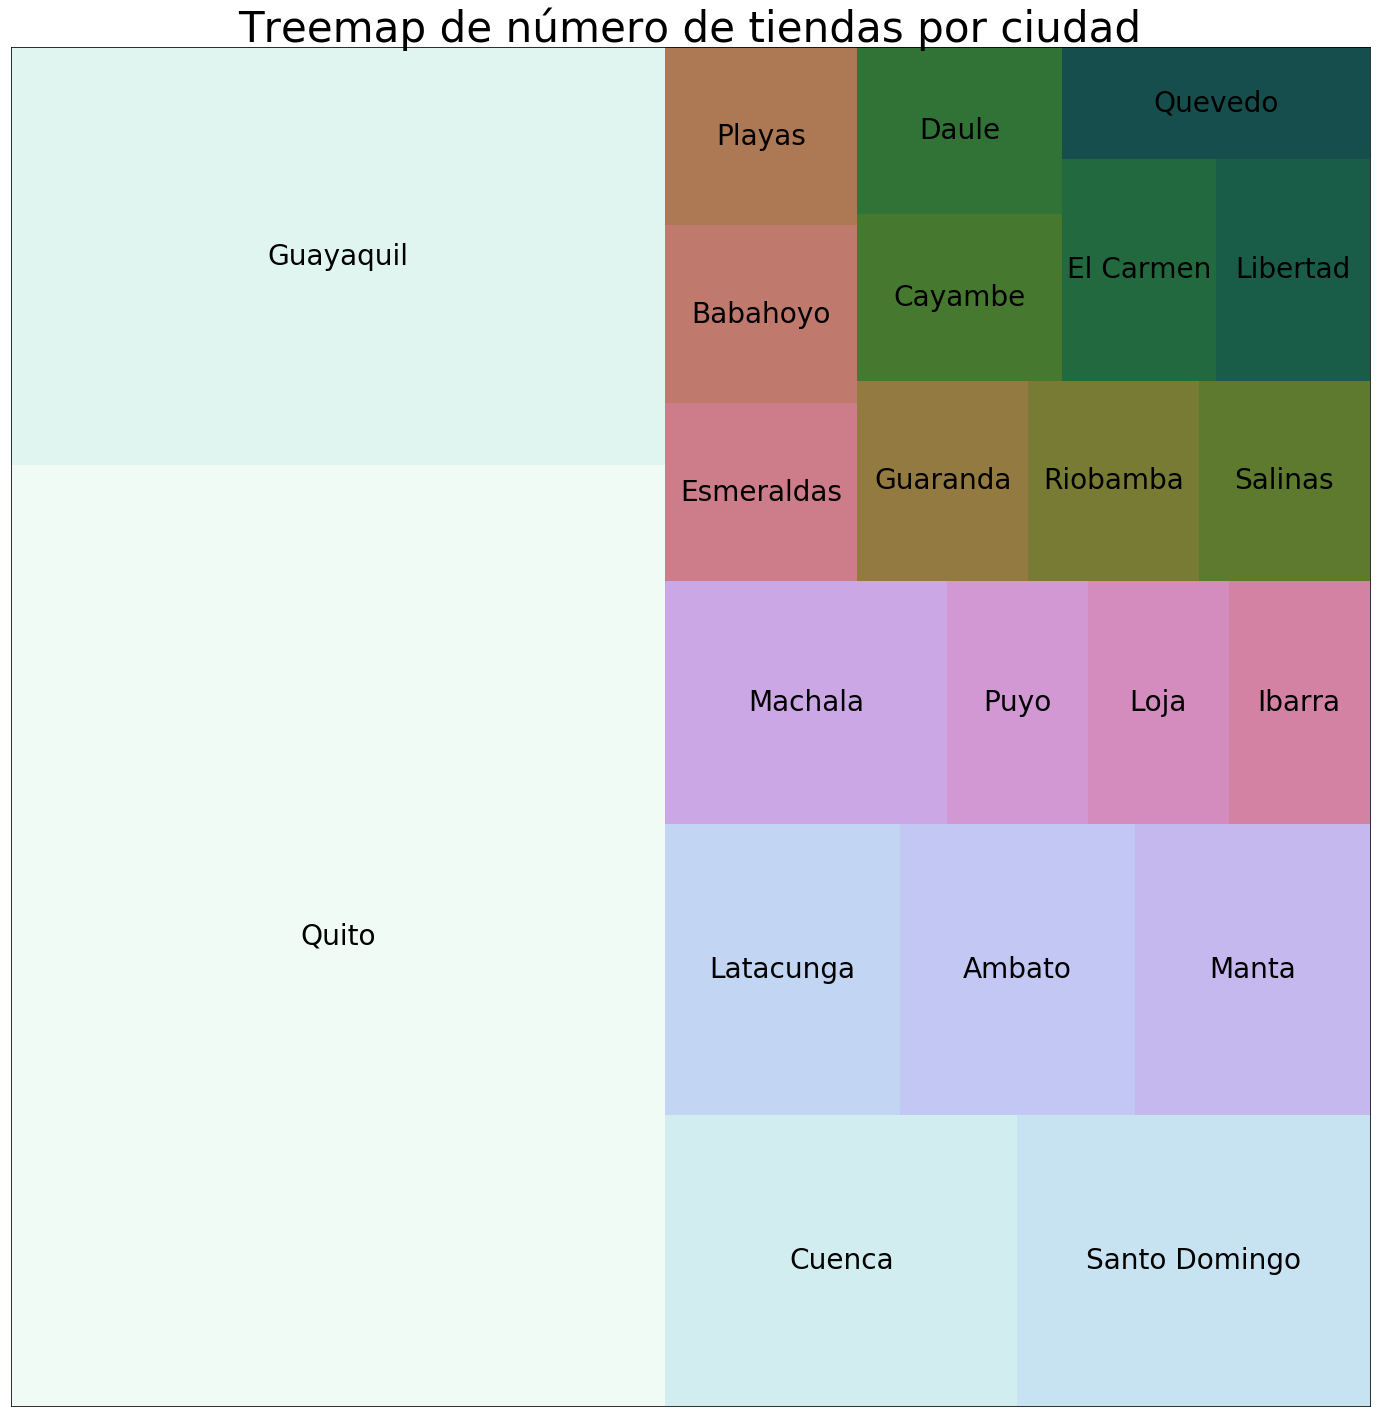

In [6]:
plt.rc('font', size=28) 
fig = plt.figure(figsize=(16, 11))
marrimeko=stores.city.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['city'].values,label=marrimeko.index,
              color=sns.color_palette('cubehelix_r', 28), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap de número de tiendas por ciudad", fontsize=42)
plt.show();

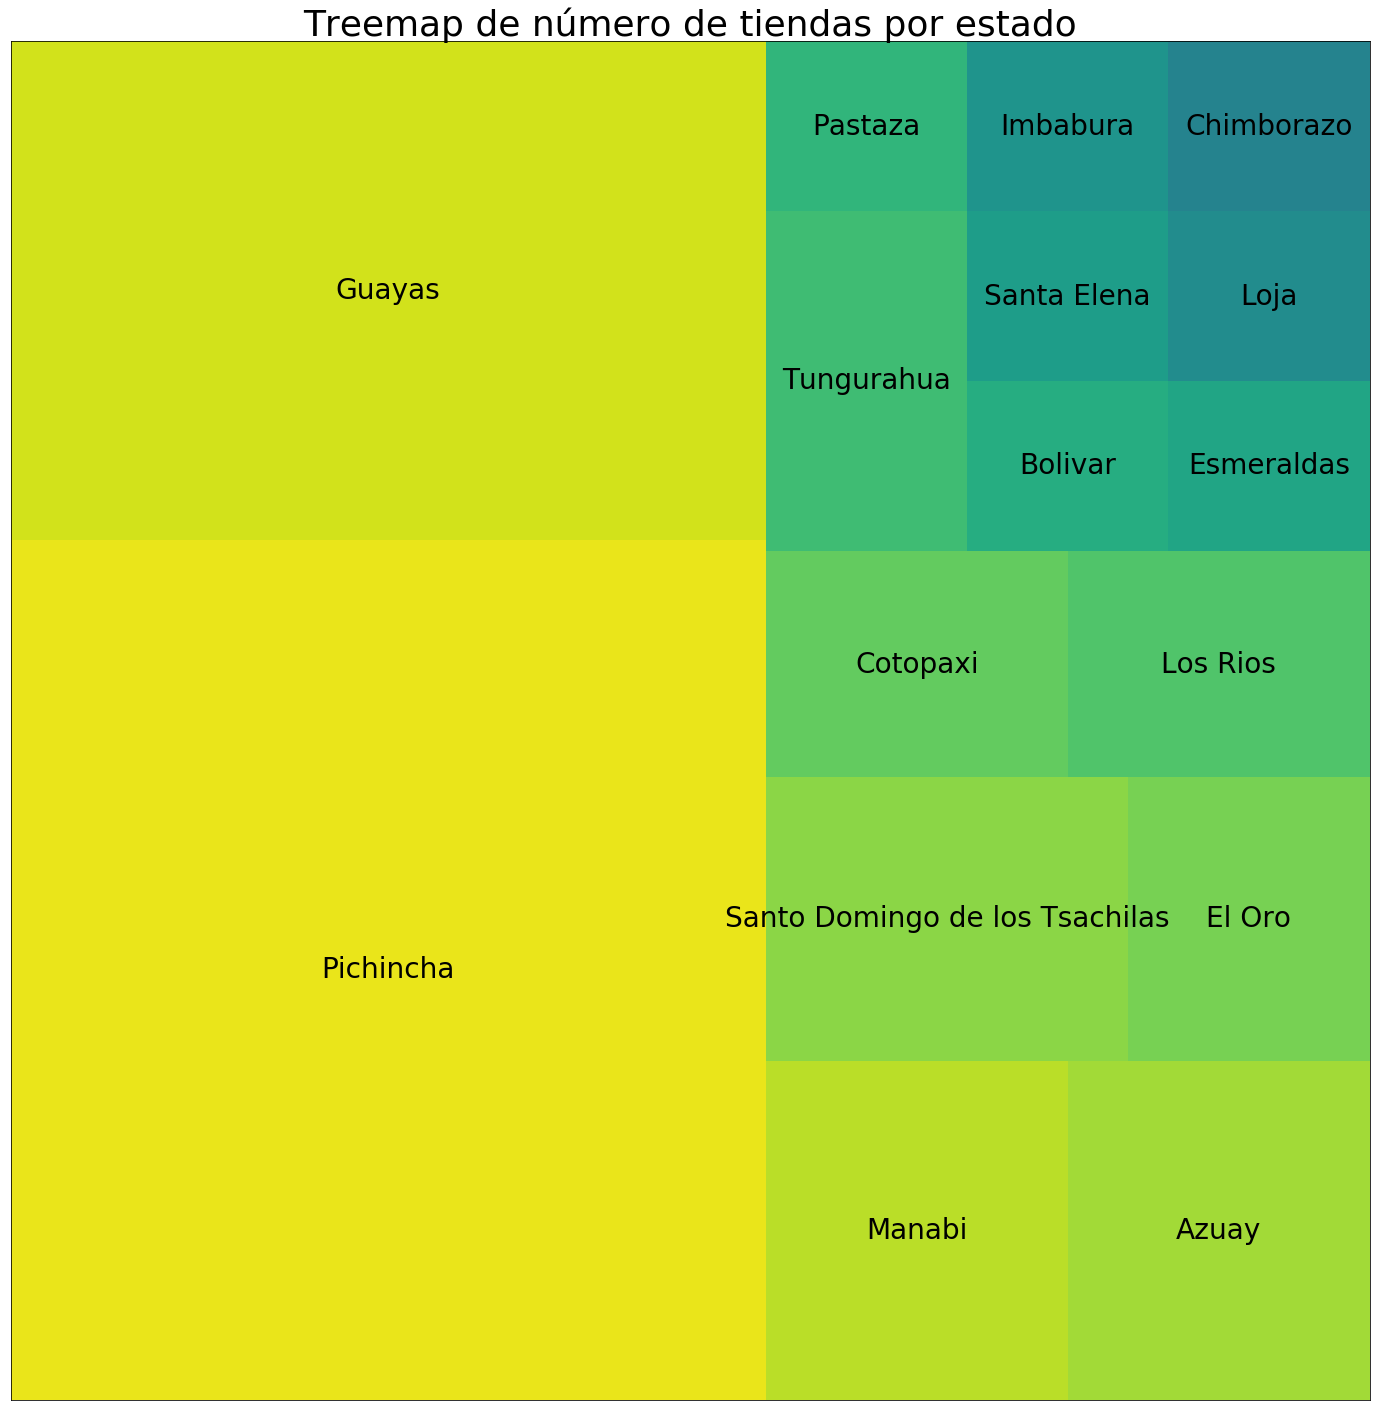

In [7]:
fig = plt.figure(figsize=(14, 11))
marrimeko=stores.state.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['state'].values,label=marrimeko.index,
              color=sns.color_palette('viridis_r', 28), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap de número de tiendas por estado", fontsize=36)
plt.show()

El siguiente gráfico explora si existe un patrón que asocia número de tienda con cluster.  
En una fase posterior asociaré cluster con otros atributos de la tienda para buscar mas posibles patrones.

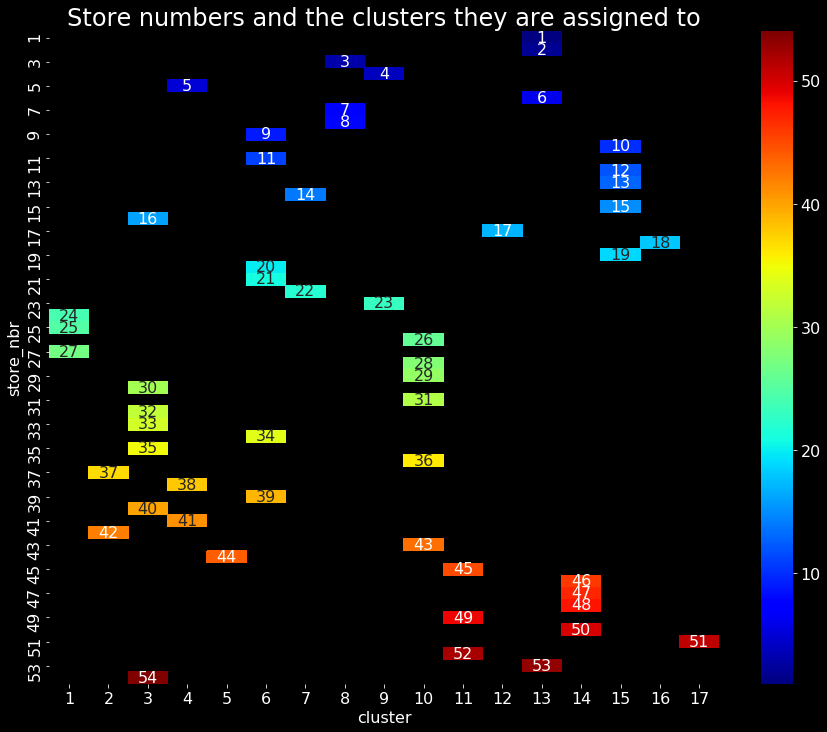

In [10]:
# Finally plot the seaborn heatmap
plt.rc('font', size=16) 
plt.style.use('dark_background')
plt.figure(figsize=(15,12))
store_pivot = stores.dropna().pivot("store_nbr","cluster", "store_nbr")
ax = sns.heatmap(store_pivot, cmap='jet', annot=True, linewidths=0, linecolor='white')
plt.title('Store numbers and the clusters they are assigned to', fontsize=24)

In [20]:
neworder = [23, 24, 26, 36, 41, 15, 29, 31, 32, 34, 39, 
            53, 4, 37, 40, 43, 8, 10, 19, 20, 33, 38, 13, 
            21, 2, 6, 7, 3, 22, 25, 27, 28, 30, 35, 42, 44, 
            48, 51, 16, 0, 1, 5, 52, 45, 46, 47, 49, 9, 11, 12, 14, 18, 17, 50]

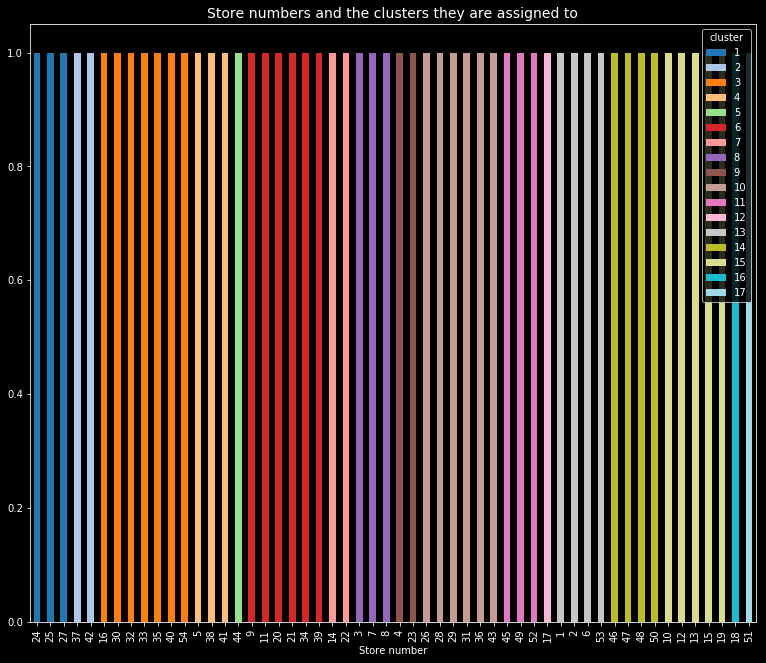

In [21]:
plt.style.use('dark_background')
nbr_cluster = stores.groupby(['store_nbr','cluster']).size()
nbr_cluster.unstack().iloc[neworder].plot(kind='bar',stacked=True, colormap= 'tab20', figsize=(13,11),  grid=False)
plt.title('Store numbers and the clusters they are assigned to', fontsize=14)
plt.ylabel('')
plt.xlabel('Store number')
plt.show()

A continuación un gráfico de barras acumuladas correspondientes a tipos de tiendas para visualizar la distribución de los clusters dentro de cada tipo.  
La conclusión primera y mas visible es que las tiendas tipo E sólo pertenecen al cluster 10.

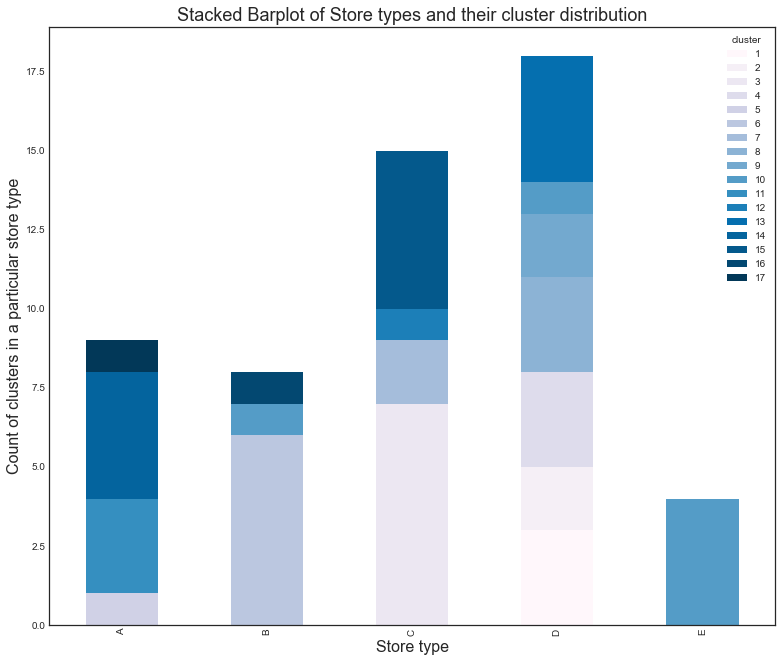

In [22]:
plt.style.use('seaborn-white')
#plt.style.use('dark_background')
type_cluster = stores.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types and their cluster distribution', fontsize=18)
plt.ylabel('Count of clusters in a particular store type', fontsize=16)
plt.xlabel('Store type', fontsize=16)
plt.show()

A continuación se ve la distribución de tipos de tienda en cada una de las ciudades.  
Destacable el numero de tiendas en la capital Quito y en menor medida, Guayaquil, la ciudad mas poblada, con un número de tiendas muy superior al resto de las ciudades del país.

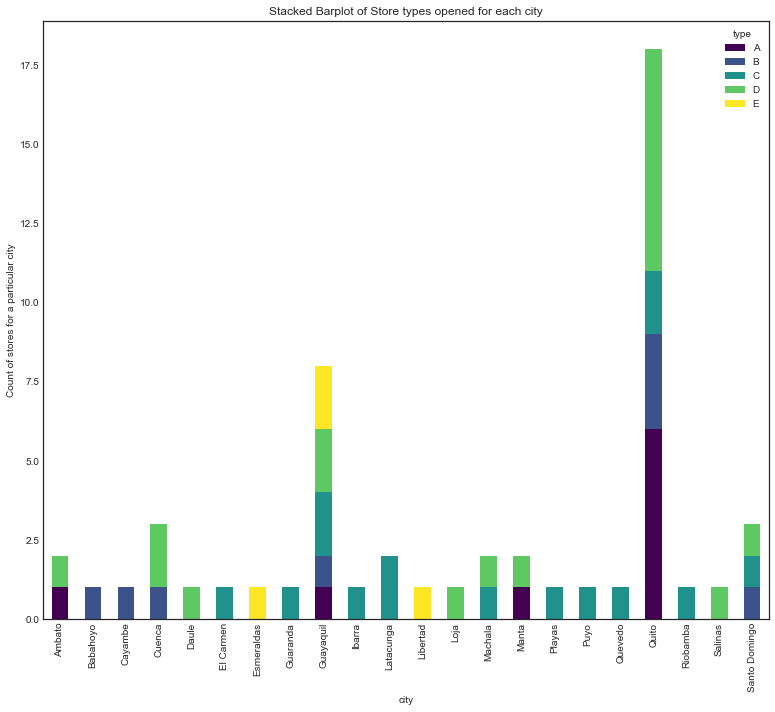

In [23]:
# plt.style.use('dark_background')
plt.style.use('seaborn-white')
city_cluster = stores.groupby(['city','type']).store_nbr.size()
city_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'viridis', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types opened for each city')
plt.ylabel('Count of stores for a particular city')
plt.show()

## Datos de Festivos  
Existen fiestas locales, regionales y nacionales. Además un día laboral se puede convertir en fiesta por decreto (puente) y aparece como tipo Additional.
La columna transferred indica que esta fiesta ha sido desplazada, precisamente para mantener el calendario laboral sin añadir vacaciones adicionales.


In [24]:
holiday_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


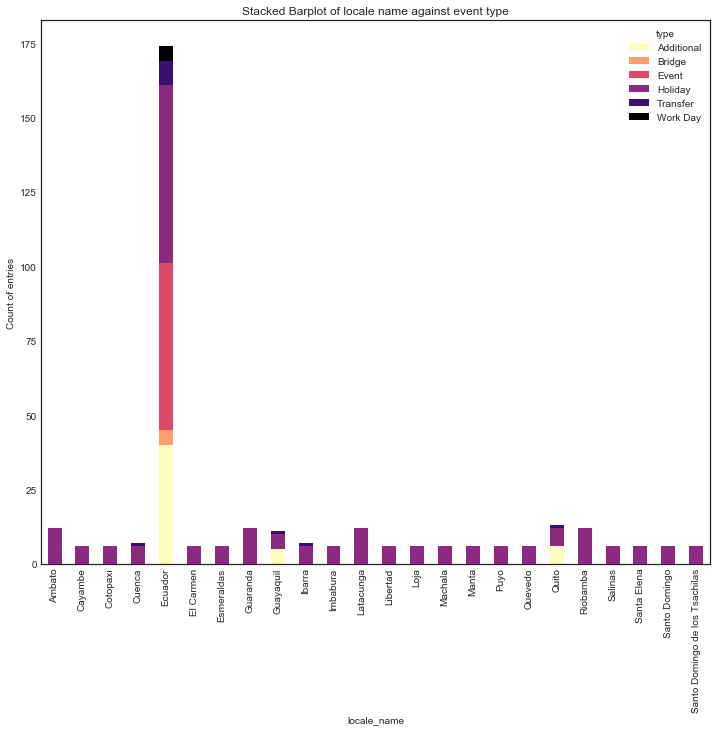

In [25]:
plt.style.use('seaborn-white')
# plt.style.use('dark_background')
holiday_local_type = holiday_events.groupby(['locale_name', 'type']).size()
holiday_local_type.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')
plt.show()

Porporción de fiestas nacionales (barra Ecuador), respecto a los demas tipos.  
## Datos de transacciones  
Un dato importante a considerar es que la ventana de tiempo de las transacciones incluidas en este apartado corresponde al tiempo de los datos de training.

In [27]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


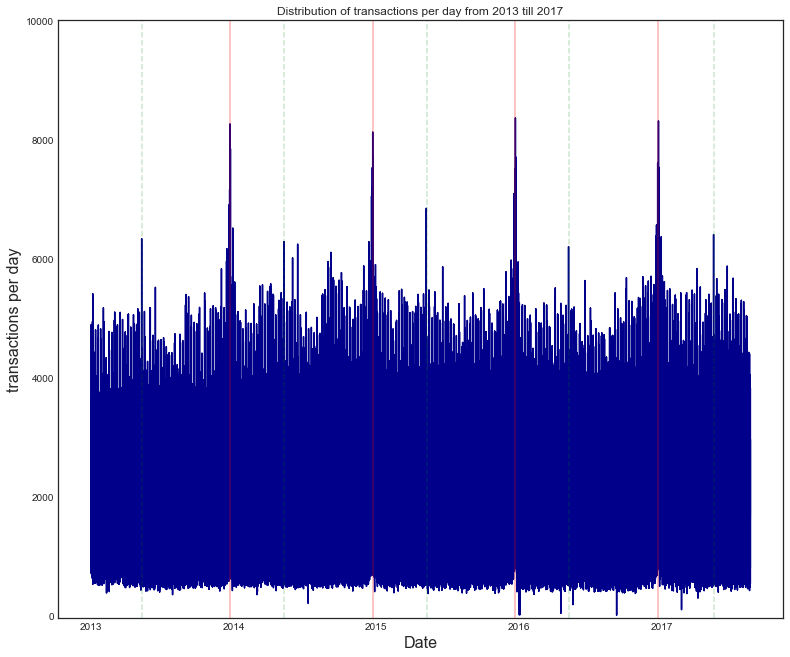

In [28]:
plt.style.use('seaborn-white')
plt.figure(figsize=(13,11))
plt.plot(transactions.date.values, transactions.transactions.values, color='darkblue')
plt.axvline(x='2015-12-23',color='red',alpha=0.3)
plt.axvline(x='2016-12-23',color='red',alpha=0.3)
plt.axvline(x='2014-12-23',color='red',alpha=0.3)
plt.axvline(x='2013-12-23',color='red',alpha=0.3)
plt.axvline(x='2013-05-12',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2015-05-10',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2016-05-08',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2014-05-11',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2017-05-14',color='green',alpha=0.2, linestyle= '--')
plt.ylim(-50, 10000)
plt.title("Distribution of transactions per day from 2013 till 2017")
plt.ylabel('transactions per day', fontsize= 16)
plt.xlabel('Date', fontsize= 16)
plt.show()

En este gráfico de transacciones por día se aprecia el pico de ventas que ocurre coincidiendo con el final de año, (linea vertical roja) y en menor medida el aumento de ventas a mediados de mayo (linea vertical punteada verde).  
Este patrón probablemente coincide con campañas de ofertas y descuentos promovidos por la Corporación Favorita.

## Datos de productos  

La información de los productos se limita a asignar familia a cada producto y como se verá abajo, la inmensa mayoría on comestibles.  Indica también si son precederos

In [32]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [29]:
x, y = (list(x) for x in zip(*sorted(zip(items.family.value_counts().index, 
                                         items.family.value_counts().values), 
                                        reverse = False)))
trace2 = go.Bar(
    y=items.family.value_counts().values,
    x=items.family.value_counts().index,
    marker=dict(
        color=items.family.value_counts().values,
        colorscale = 'Portland',
        reversescale = False
    ),
    orientation='v',
)

layout = dict(
    title='Counts of items per family category',
     width = 800, height = 800,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

Este gráfico interactivo indica la proporción logarítmica de numero de productos, siendo los mas numerosos los comestibles, bebidas, limpieza y lacteos.

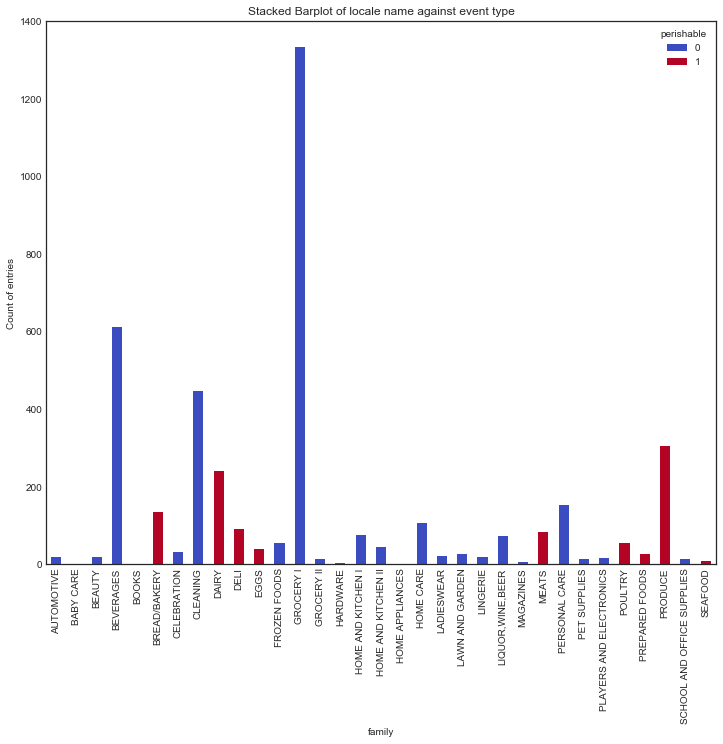

In [33]:
plt.style.use('seaborn-white')
fam_perishable = items.groupby(['family', 'perishable']).size()
fam_perishable.unstack().plot(kind='bar',stacked=True, colormap= 'coolwarm', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')
plt.show()

El gráfico anterior revela las familias de producto que son perecederas.

### Referencias:  
- Dataframe with all Date-Store-Item Combinations
- Comprehensive Python and D3.js Favorita analytics. https://www.kaggle.com/arthurtok/comprehensive-python-and-d3-js-favorita-analytics  
- Memory Optimization and EDA on entire dataset. https://www.kaggle.com/jagangupta/memory-optimization-and-eda-on-entire-dataset